<a href="https://colab.research.google.com/github/vishnupriya0102/demo/blob/main/Outliers_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Importing Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


df = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')

## Data Cleaning and Analysis

In [4]:
# Data Cleaning

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d-%m-%Y')

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)
# Ensure appropriate data types
print("Data types of each column:\n", df.dtypes)

Missing values in each column:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
Data types of each column:
 Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name    

### Data Visualizations

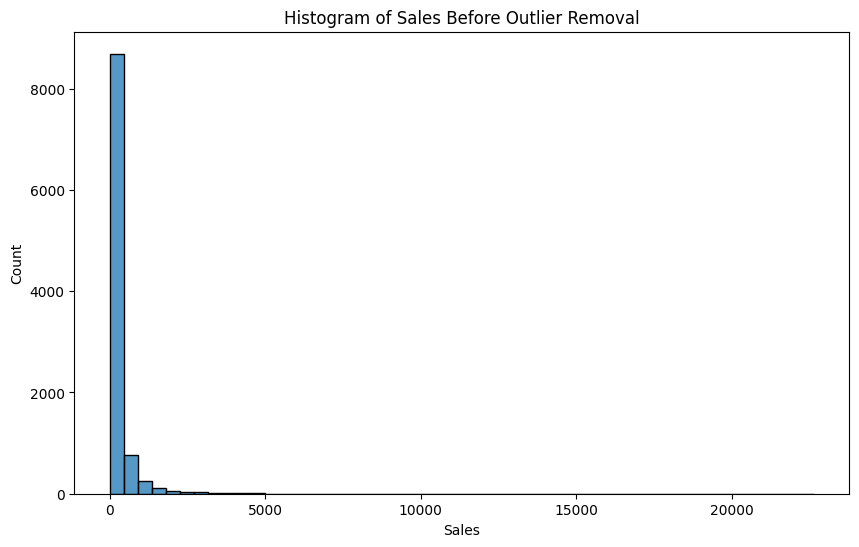

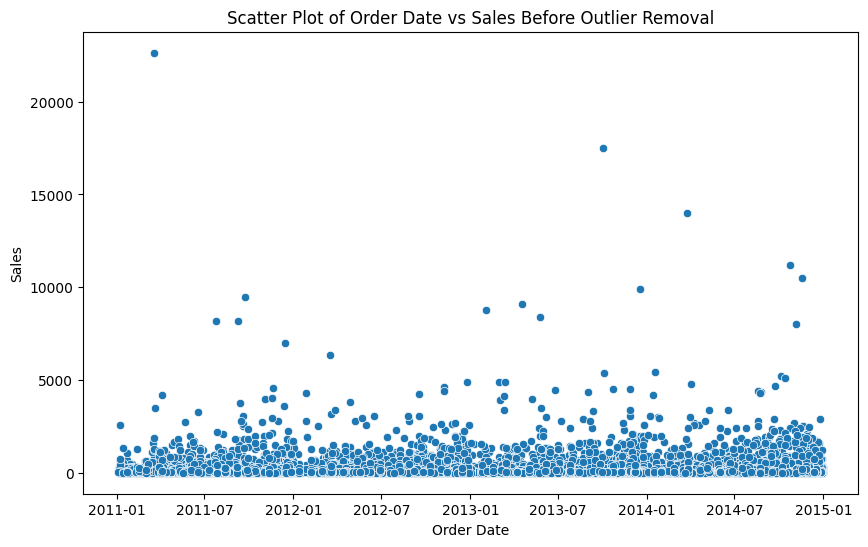

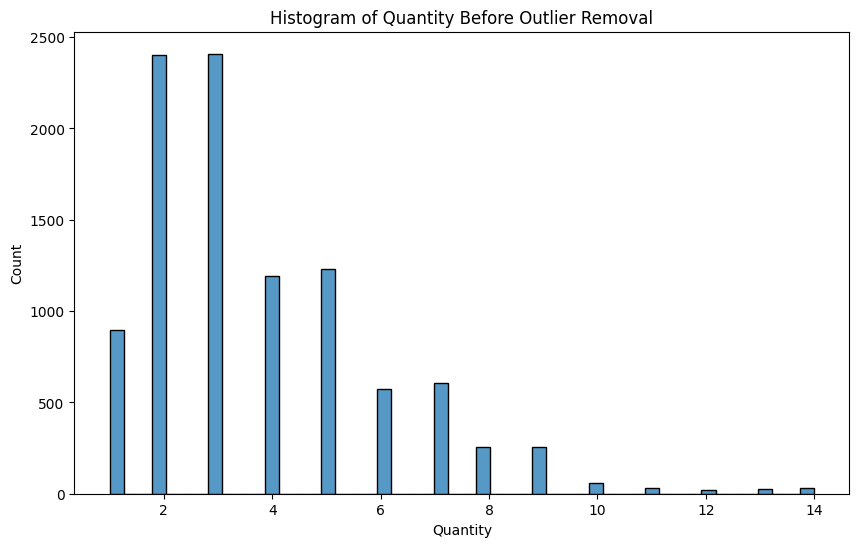

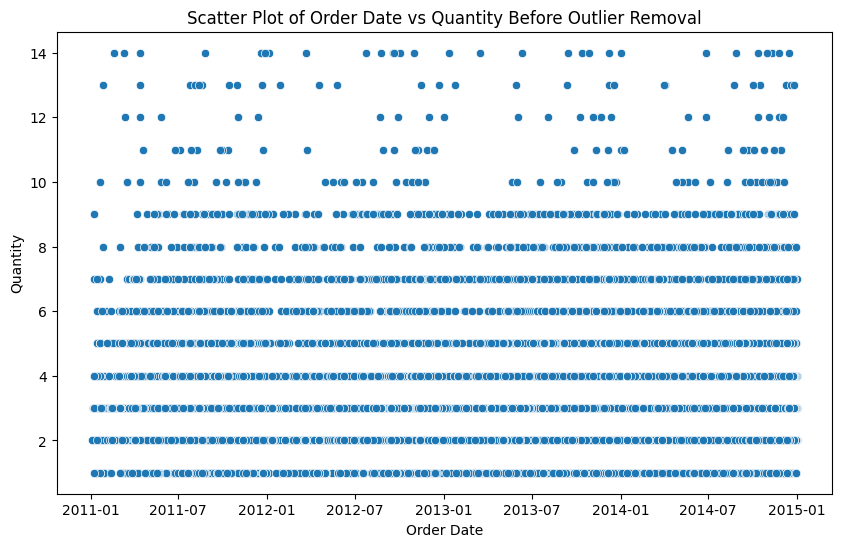

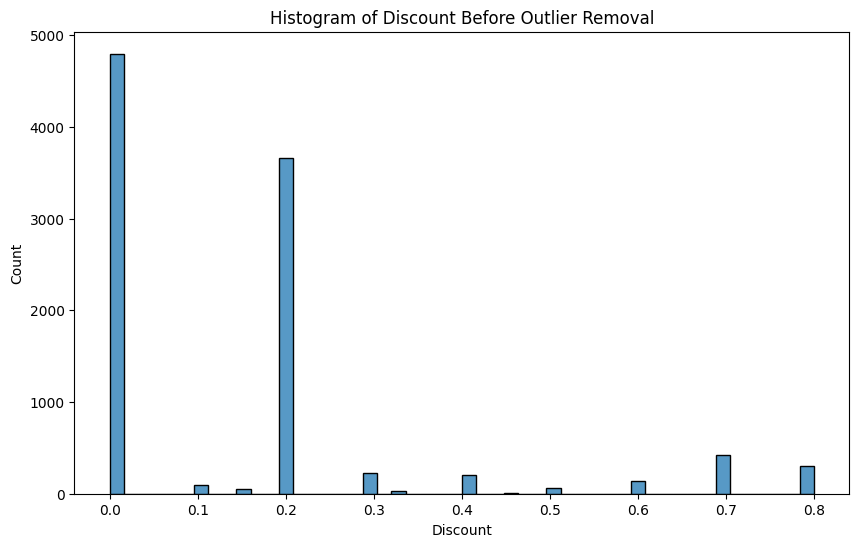

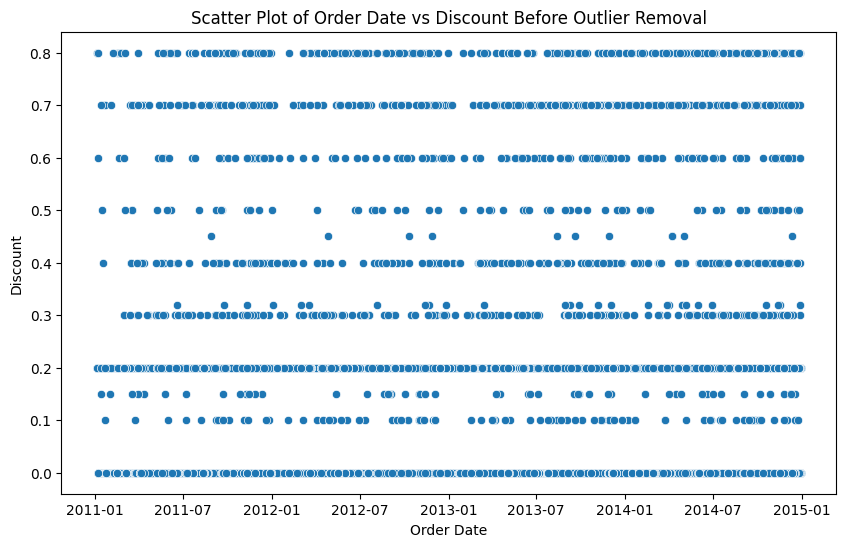

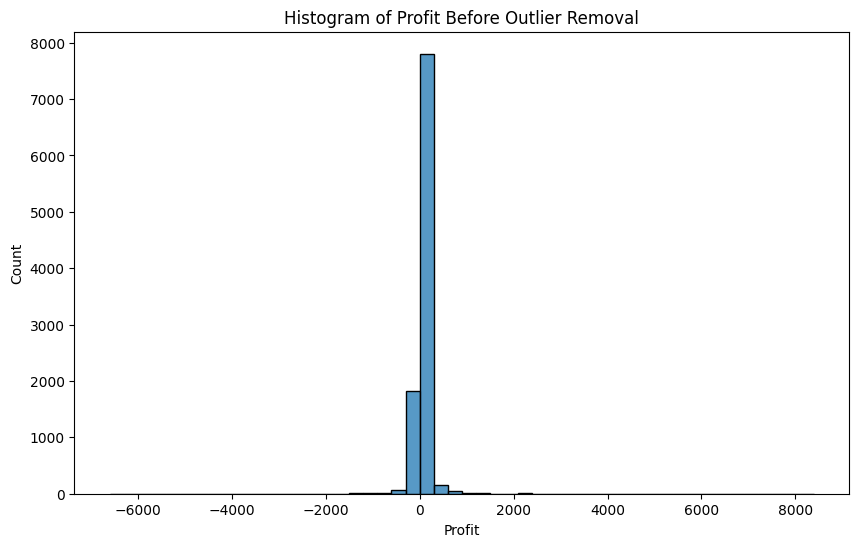

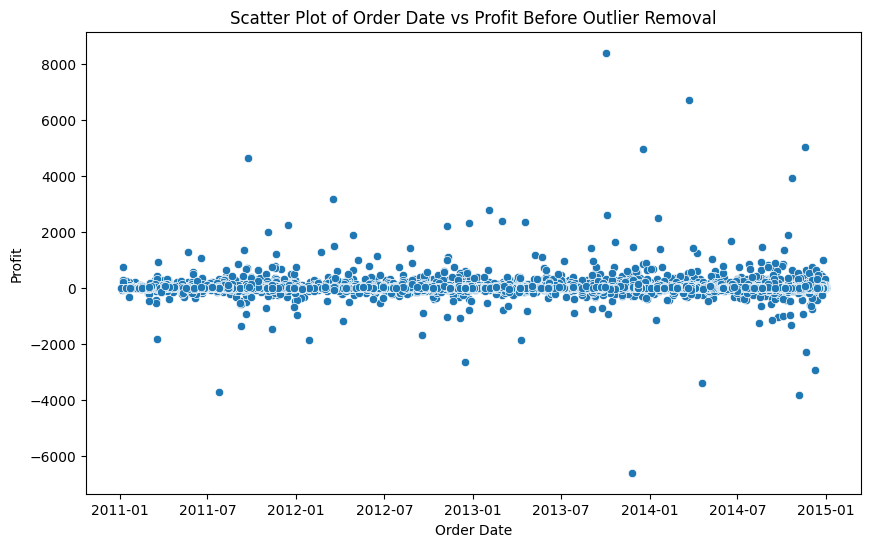

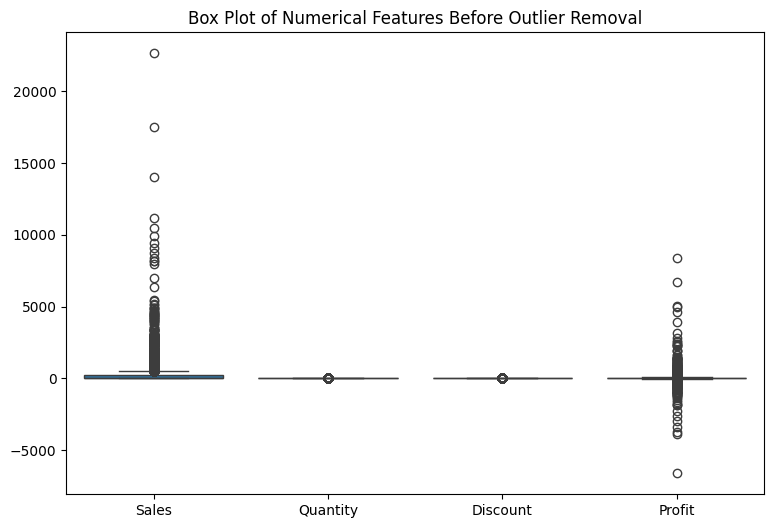

In [5]:
# Numerical columns for outlier detection
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit']

# Histograms and Scatter plots before outlier removal
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=50).set(title=f"Histogram of {col} Before Outlier Removal", xlabel=col)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Order Date', y=col, data=df).set(title=f"Scatter Plot of Order Date vs {col} Before Outlier Removal", xlabel="Order Date", ylabel=col)
    plt.show()

# Boxplot visualization before outlier removal
plt.figure(figsize=(9, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plot of Numerical Features Before Outlier Removal')
plt.show()


 ### Outlier Detection and Removal using Interquartile Method (IQR)

Sales - IQR lower limit: -271.71000000000004
Sales - IQR upper limit: 498.93
Number of outliers in Sales using IQR: 1167
Profit - IQR lower limit: -27.7471
Profit - IQR upper limit: 50.7849
Number of outliers in Profit using IQR: 1435


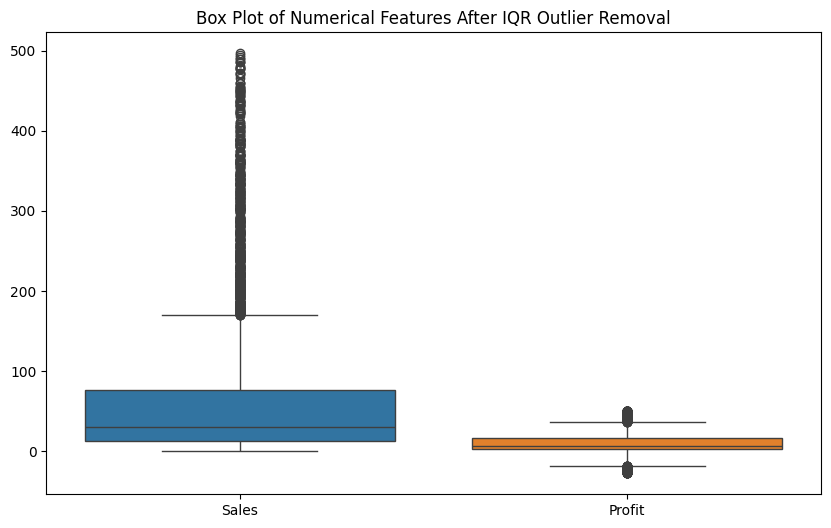

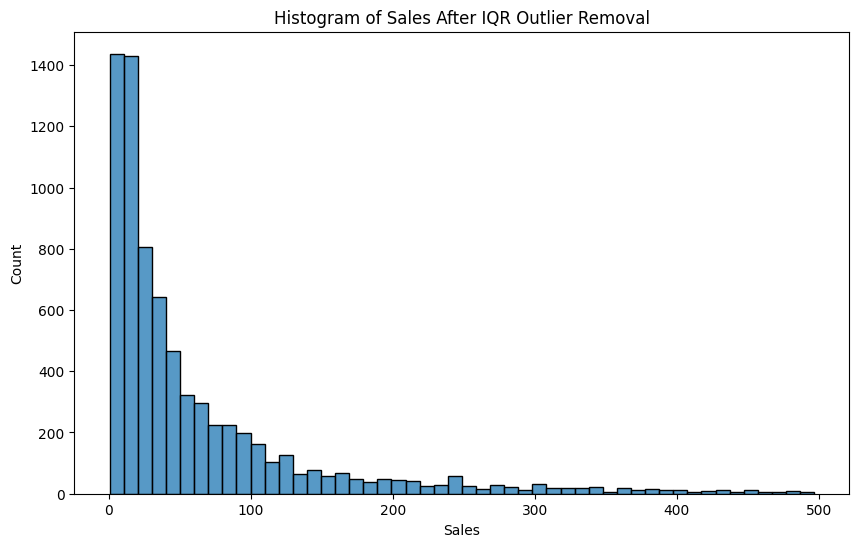

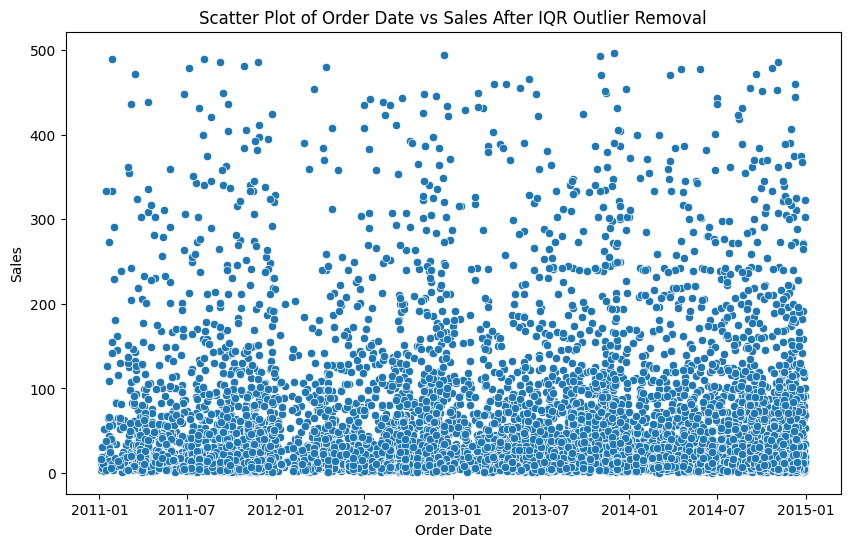

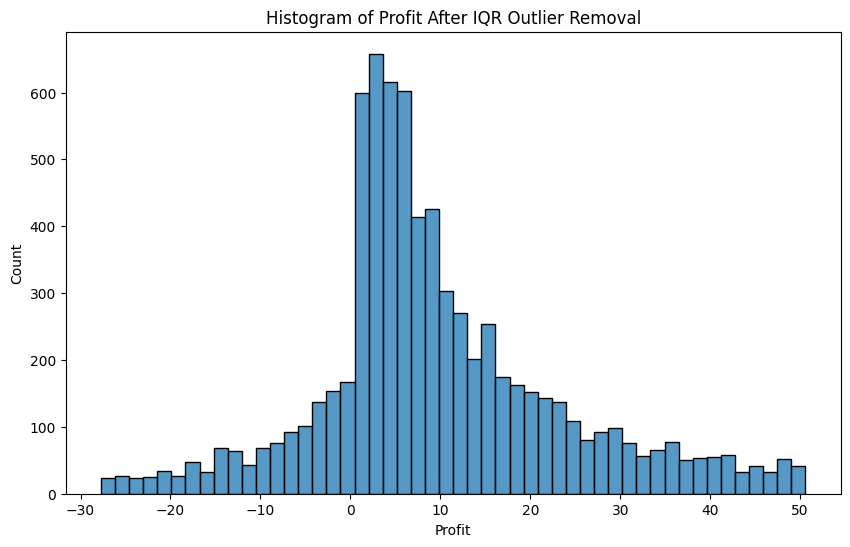

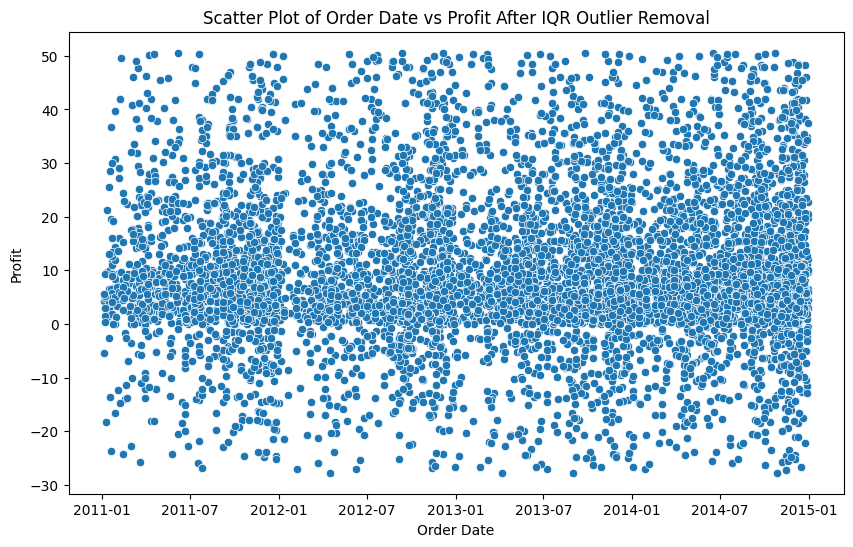

In [6]:
# Outlier Detection and Removal using IQR
numerical_cols=['Sales','Profit']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit_iqr = Q1 - 1.5 * IQR
    upper_limit_iqr = Q3 + 1.5 * IQR

    print(f"{col} - IQR lower limit: {lower_limit_iqr}")
    print(f"{col} - IQR upper limit: {upper_limit_iqr}")

    outliers_iqr = df[(df[col] < lower_limit_iqr) | (df[col] > upper_limit_iqr)]
    print(f"Number of outliers in {col} using IQR: {outliers_iqr.shape[0]}")

    # Filtered Data
    df = df[(df[col] >= lower_limit_iqr) & (df[col] <= upper_limit_iqr)]

# Boxplot visualization after IQR outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plot of Numerical Features After IQR Outlier Removal')
plt.show()

# Histograms and Scatter plots after IQR outlier removal
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=50).set(title=f"Histogram of {col} After IQR Outlier Removal", xlabel=col)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Order Date', y=col, data=df).set(title=f"Scatter Plot of Order Date vs {col} After IQR Outlier Removal", xlabel="Order Date", ylabel=col)
    plt.show()


### Outlier Detection and Removal using Z-score method

Number of outliers in Sales using Z-score: 224
Number of outliers in Profit using Z-score: 31


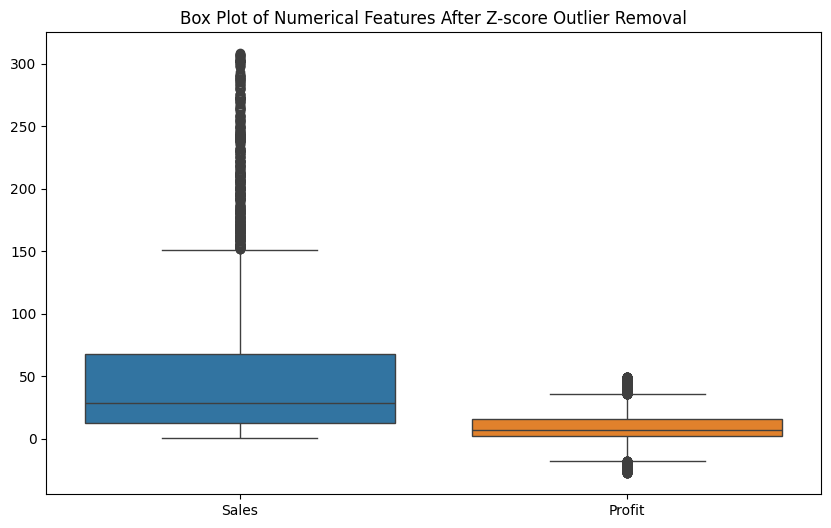

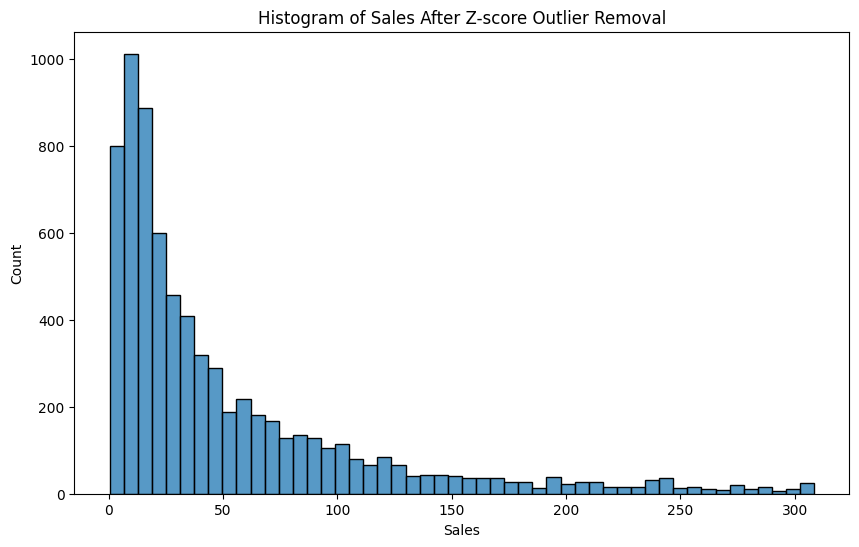

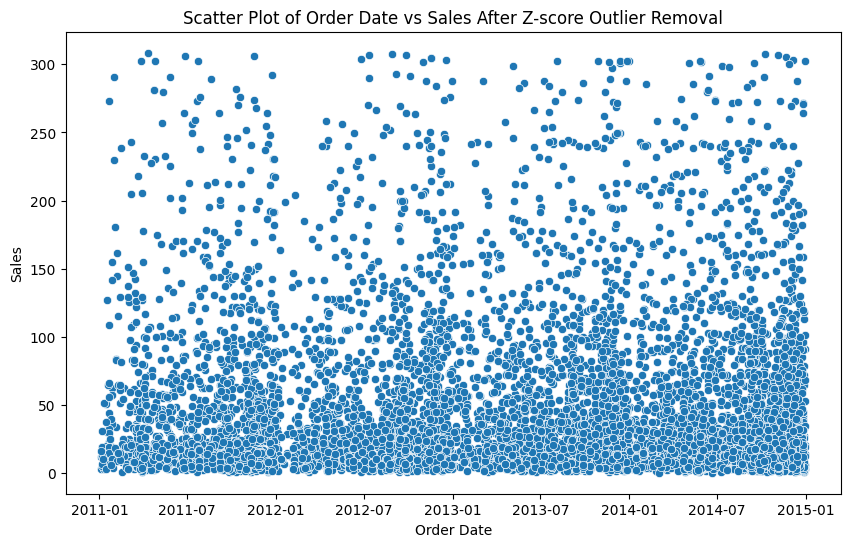

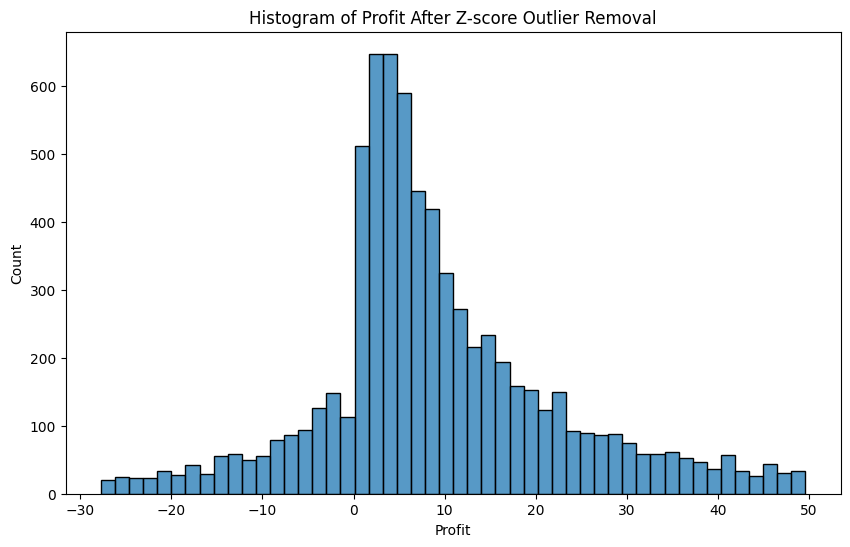

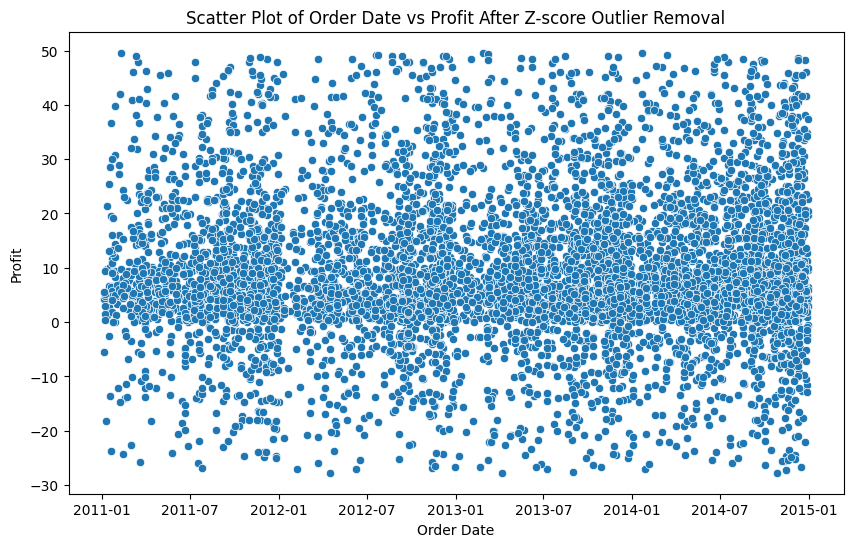

In [7]:
# Outlier Detection and Removal using Z-score
for col in numerical_cols:
    df['Z-score'] = (df[col] - df[col].mean()) / df[col].std()
    lower_limit_z = -3
    upper_limit_z = 3

    outliers_z = df[(df['Z-score'] < lower_limit_z) | (df['Z-score'] > upper_limit_z)]
    print(f"Number of outliers in {col} using Z-score: {outliers_z.shape[0]}")

    # Filtered Data
    df = df[(df['Z-score'] >= lower_limit_z) & (df['Z-score'] <= upper_limit_z)]

# Drop Z-score column after usage
df.drop(columns=['Z-score'], inplace=True)

# Boxplot visualization after Z-score outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plot of Numerical Features After Z-score Outlier Removal')
plt.show()

# Histograms and Scatter plots after Z-score outlier removal
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=50).set(title=f"Histogram of {col} After Z-score Outlier Removal", xlabel=col)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Order Date', y=col, data=df).set(title=f"Scatter Plot of Order Date vs {col} After Z-score Outlier Removal", xlabel="Order Date", ylabel=col)
    plt.show()


### Outlier Detection and Removal using Isolation Forest

Number of outliers in Sales using Isolation Forest: 69
Number of outliers in Profit using Isolation Forest: 70


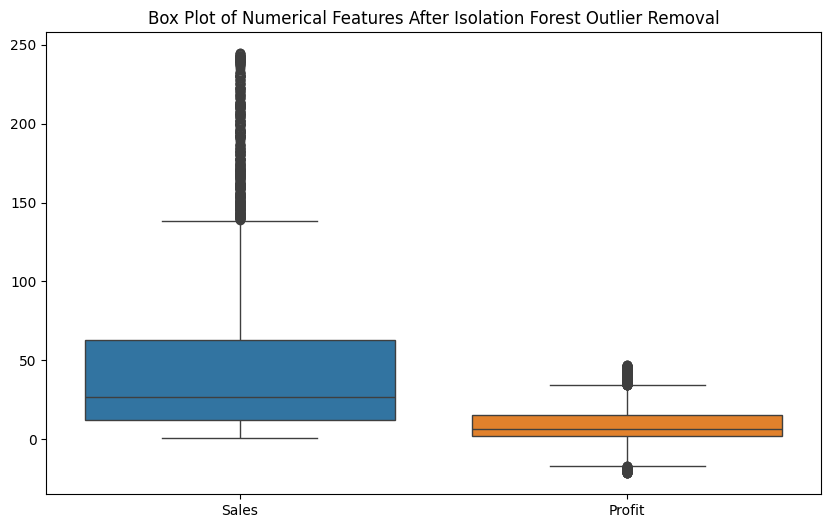

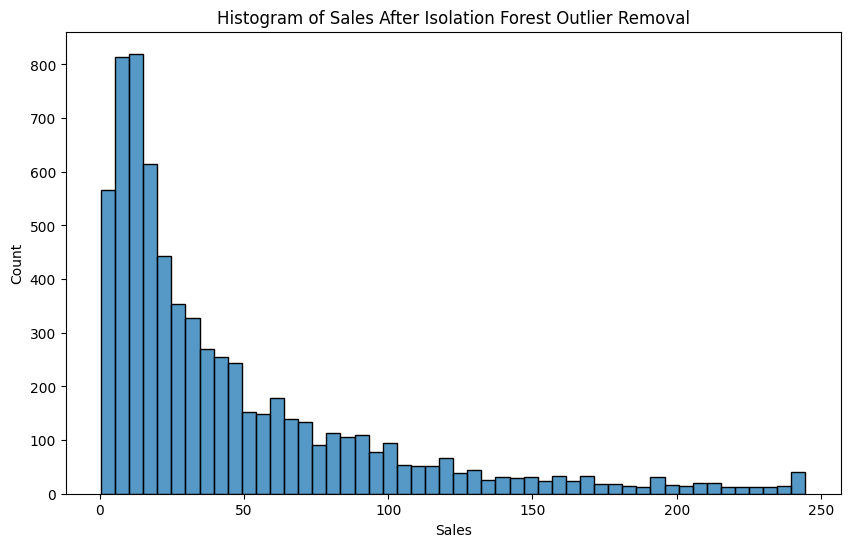

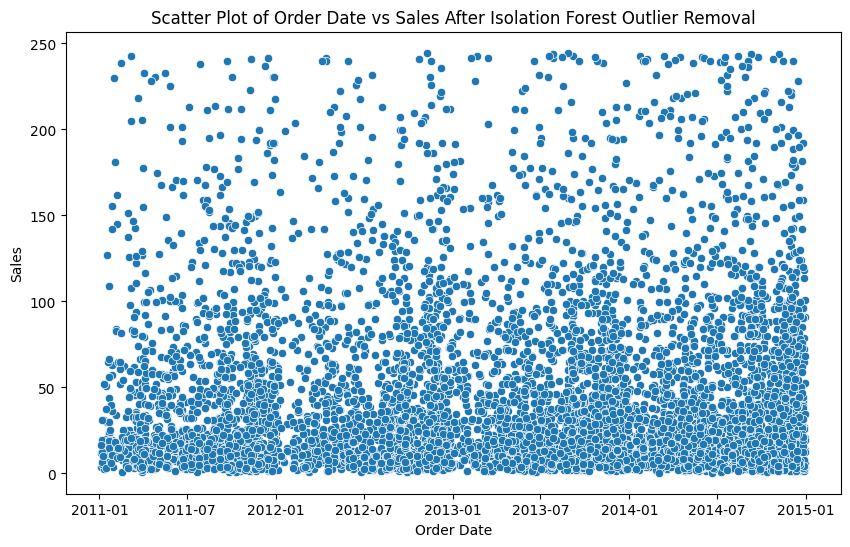

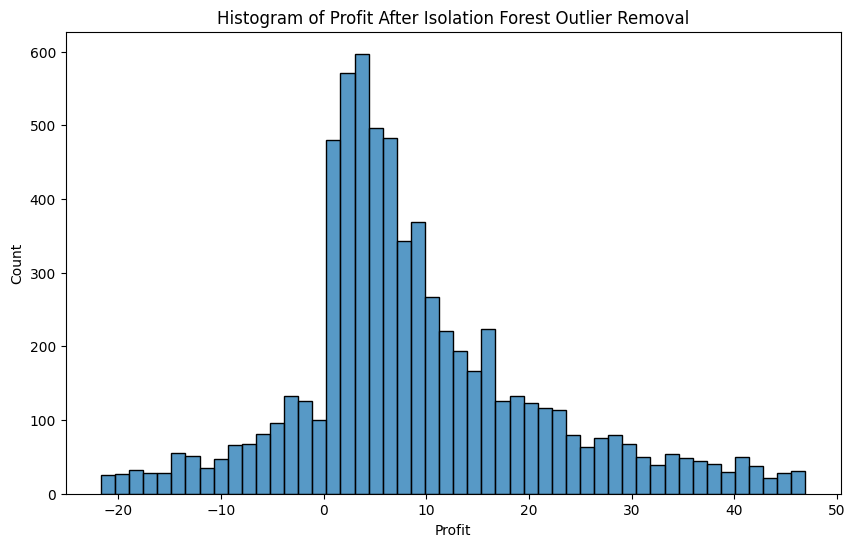

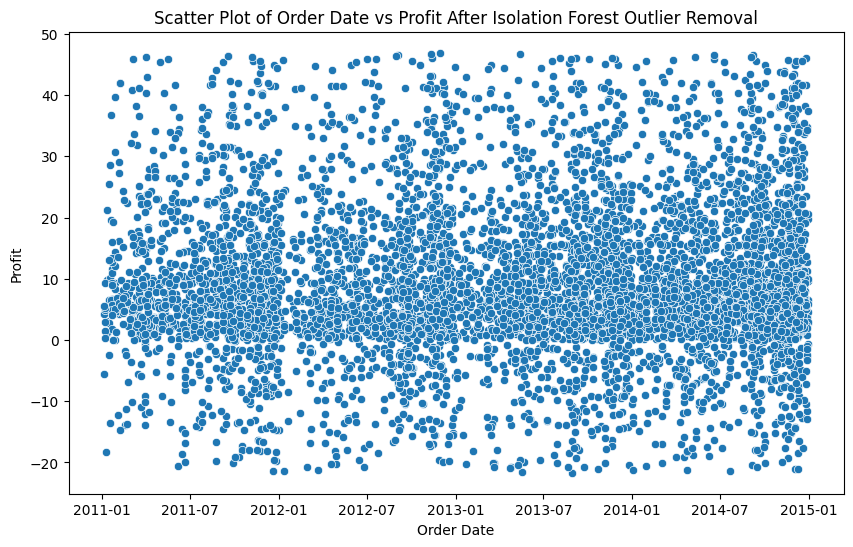

In [9]:
# Outlier Detection and Removal using Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)

for col in numerical_cols:
    df['Anomaly'] = iso_forest.fit_predict(df[[col]])
    outliers_iso = df[df['Anomaly'] == -1]
    print(f"Number of outliers in {col} using Isolation Forest: {outliers_iso.shape[0]}")

    # Filtered Data
    df = df[df['Anomaly'] == 1]

# Drop Anomaly column after usage
df.drop(columns=['Anomaly'], inplace=True)

# Boxplot visualization after Isolation Forest outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plot of Numerical Features After Isolation Forest Outlier Removal')
plt.show()

# Histograms and Scatter plots after Isolation Forest outlier removal
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=50).set(title=f"Histogram of {col} After Isolation Forest Outlier Removal", xlabel=col)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Order Date', y=col, data=df).set(title=f"Scatter Plot of Order Date vs {col} After Isolation Forest Outlier Removal", xlabel="Order Date", ylabel=col)
    plt.show()
